### Practicle 9
### Statistical Foundation of Data Sciences
### Divyanshi Bhandari
### GF202344105
### Submitted To- Anitya Sir

In [39]:
#  Step 0: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA


In [41]:
# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

# EDA
print("=== HEAD ===")
print(df.head())

print("\n=== DESCRIBE ===")
print(df.describe())

print("\n=== GROUPBY MEAN BY SPECIES ===")
print(df.groupby('species').mean())


=== HEAD ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

=== DESCRIBE ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000        

In [43]:
#  Step 2: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features scaled successfully (mean ~ 0, std ~ 1)")


Features scaled successfully (mean ~ 0, std ~ 1)


In [45]:
#  Step 3: Split data and train KNN model
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [47]:
#  Step 4: Confusion Matrix and Accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix (K=5):\n", cm)
print("\nAccuracy (K=5):", acc)


Confusion Matrix (K=5):
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Accuracy (K=5): 0.9111111111111111


In [49]:
#  Step 5: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.79      1.00      0.88        15
   virginica       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



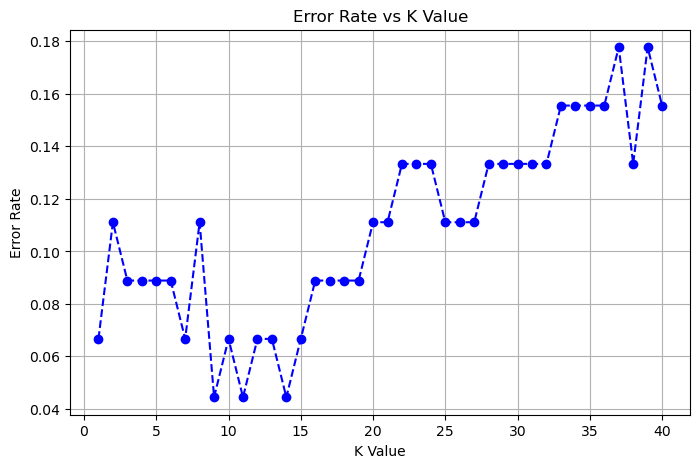

In [51]:
#  Step 6 & 7: Compare Error Rate for Different K
error_rate = []
k_values = range(1, 41)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_k = knn_k.predict(X_test)
    error_rate.append(np.mean(y_k != y_test))

# Plot Error Rate vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, error_rate, color='blue', marker='o', linestyle='dashed')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


In [53]:
# Step 8: Finding the Best K
best_k = k_values[np.argmin(error_rate)]
print("Best K value =", best_k)


Best K value = 9


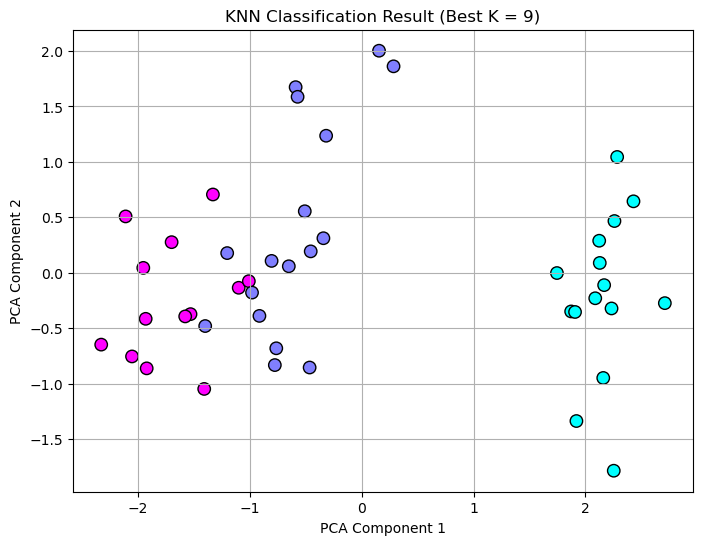

Model visualization completed 


In [55]:
#  Step 9: Visualize the Test Result using PCA (2D)
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_best_pred = knn_best.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_best_pred, cmap='cool', edgecolor='k', s=80)
plt.title(f"KNN Classification Result (Best K = {best_k})")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

print("Model visualization completed ")
